<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/git_copy_graph_stats_for_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pathlib
from datetime import date

date = str(date.today())


new_dir = pathlib.Path('.../images/', date)
new_dir.mkdir(parents=True, exist_ok=True)


In [ ]:
president_approval= pd.read_csv('...Levada/2022-08-09/Levada_Putin’s approval rating.csv')

In [ ]:
president_approval['date'] = pd.to_datetime(president_approval['date'].str.strip(), format='%Y-%m')

In [ ]:
goverment_approval = pd.read_csv('...Levada/2022-08-09/Levada_Approval of the government.csv')
goverment_approval['date'] = pd.to_datetime(goverment_approval['date'].str.strip(), format='%Y-%m')

In [ ]:
#Approval ratings Max Min, 'Apprvove only'

mini_max = president_approval[(president_approval['Approve']==president_approval['Approve'].max()) | 
                              ( president_approval['Approve']==president_approval['Approve'].min())]
mini_max_approve = mini_max[['date','Approve']]

print('Min and Max approval values for the Russian Federation Presidency')
print(mini_max_approve.to_string(index=False))

Min and Max approval values for the Russian Federation Presidency
      date  Approve
1999-08-01     31.0
2015-06-01     89.0


In [ ]:
putin_only = president_approval[president_approval['date']>'2000']
print('Min and Max approval values for Mr. Putin')
mini_max_putin =putin_only[(putin_only['Approve']==putin_only['Approve'].max()) | 
                              ( putin_only['Approve']==putin_only['Approve'].min())]
mini_max_putin_approve = mini_max_putin [['date','Approve']] 
print(mini_max_putin_approve.to_string(index=False))

Min and Max approval values for Mr. Putin
      date  Approve
2015-06-01     89.0
2020-04-01     59.0
2020-05-01     59.0


2020 amendments to the Constitution of Russia were approved on 1 July: One of the changes effectively allows the sitting Presidet to run again for office. (source: https://en.wikipedia.org/wiki/2020_amendments_to_the_Constitution_of_Russia)

In [ ]:
key_dates = mini_max_putin_approve.date.to_list()[:-1]


In [ ]:
mini_max_putin_approve.date.to_list()[:-1]

[Timestamp('2015-06-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]

In [ ]:
d1 = pd.Timestamp('2022-1')
d2= pd.Timestamp('2000-5')

In [ ]:
key_dates.insert(0, d2)
key_dates.insert(4, d1)

In [ ]:
key_dates

[Timestamp('2000-05-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00')]

In [ ]:
text = [' Putin\nFirst term',' Putin\n max', ' Putin\n min', '2022']

In [ ]:
means_p = (president_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()
means_g =(goverment_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()


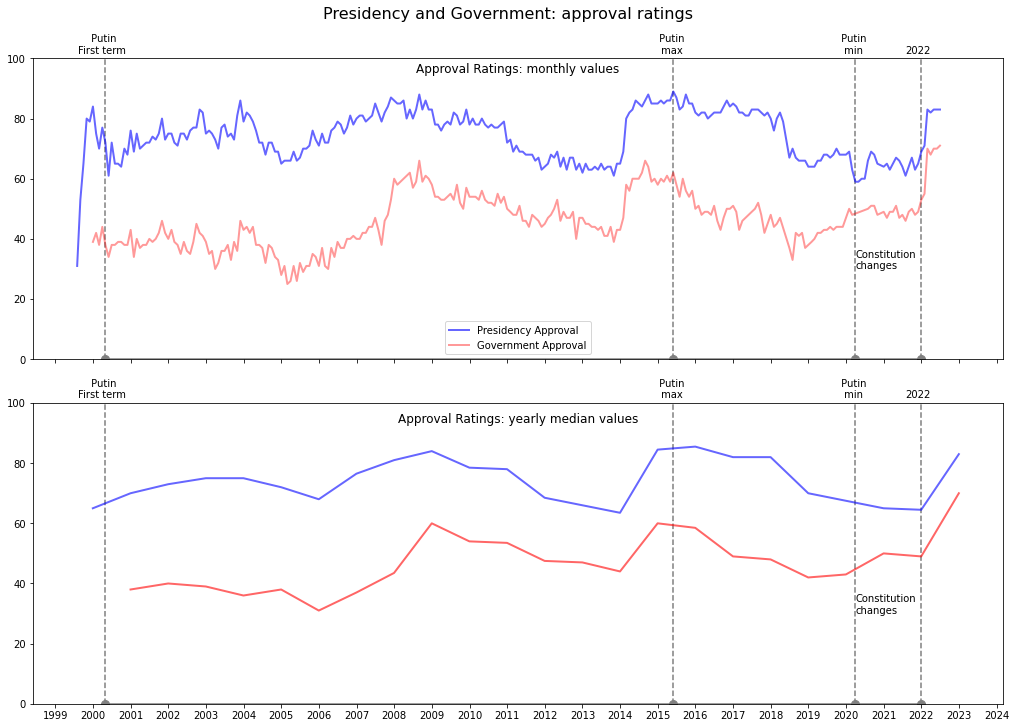

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(ncols=1, nrows =2, figsize=(14, 10), constrained_layout=True, sharey=True, sharex=True)


plt.ylim(0,100, 20)

ax[0].plot(president_approval.date,president_approval['Approve'], linewidth=2,alpha=0.6, color='blue' )
ax[0].plot(goverment_approval.date,goverment_approval['Approve'], linewidth=2,alpha=0.4, color='red' )

col = ['navy', 'blue', 'mediumblue', 'black','gray']


levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]



ax[0].vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax[0].plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax[0].axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax[0].text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')


ax[1].vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax[1].plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

for d1, l1, r1 in zip(key_dates, levels, text):
    ax[1].annotate(r1, xy=(d1, l1),
                xytext=(-3, np.sign(l1)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax[1].axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax[1].text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')



ax[1].plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.6, color='blue')
ax[1].plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.6, color='red')


ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax[0].get_xticklabels(), rotation=30, ha="right")


ax[0].legend(['Presidency Approval', 'Government Approval'], loc='lower center')

ax[0].set_title('Approval Ratings: monthly values', y=1.0, pad=-14)


ax[1].set_title('Approval Ratings: yearly median values', y=0.98, pad=-14)
fig.suptitle('Presidency and Government: approval ratings', fontsize=16)

plt.savefig(str(new_dir)+ '/gov_pres_approval_ratings.jpg')


In [ ]:
moving= pd.read_csv('...2022-08-09/Levada_Assessment of situation in the country.csv')
moving['date'] = pd.to_datetime(moving['date'].str.strip(), format='%Y-%m')

In [ ]:
ssi = pd.read_csv('...2022-08-09/Levada_Social Sentiment Index (SSI).csv')
ssi['date'] = pd.to_datetime(ssi['date'].str.strip(), format='%Y-%m')

In [ ]:
means_moving = (moving.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()
means_ssi =(ssi.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()

In [ ]:
moving.tail(6)

,date,In the right direction,On the wrong track,Difficult to answer
299,2022-02-01,52.0,38.0,10.0
300,2022-03-01,69.0,22.0,9.0
301,2022-04-01,66.0,24.0,10.0
302,2022-05-01,68.0,22.0,10.0
303,2022-06-01,68.0,22.0,9.0
304,2022-07-01,68.0,22.0,10.0


In [ ]:
moving.sort_values(by='In the right direction', ascending=False).head(8)

,date,In the right direction,On the wrong track,Difficult to answer
300,2022-03-01,69.0,22.0,9.0
304,2022-07-01,68.0,22.0,10.0
303,2022-06-01,68.0,22.0,9.0
302,2022-05-01,68.0,22.0,10.0
301,2022-04-01,66.0,24.0,10.0
210,2014-08-01,64.0,22.0,14.0
220,2015-06-01,64.0,22.0,14.0
130,2007-12-01,64.0,20.0,16.0


In [ ]:
ssi.sort_values(by='Social Sentiment Index', ascending=False).head(8)

,date,Social Sentiment Index
79,2008-03-01,100.0
80,2008-06-01,97.0
160,2022-07-01,96.0
78,2008-01-01,95.0
81,2008-09-01,95.0
159,2022-05-01,94.0
158,2022-03-01,90.0
114,2014-06-01,90.0


In [ ]:
ssi.tail(3)

,date,Social Sentiment Index
158,2022-03-01,90.0
159,2022-05-01,94.0
160,2022-07-01,96.0


In [ ]:
maxo = (ssi[ssi['Social Sentiment Index']==ssi['Social Sentiment Index'].max()])
maxo_2022 = (ssi[ssi['date']>'2022'].max()).T

In [ ]:
dates = maxo['date'].to_list()
dates.append(maxo_2022[0])

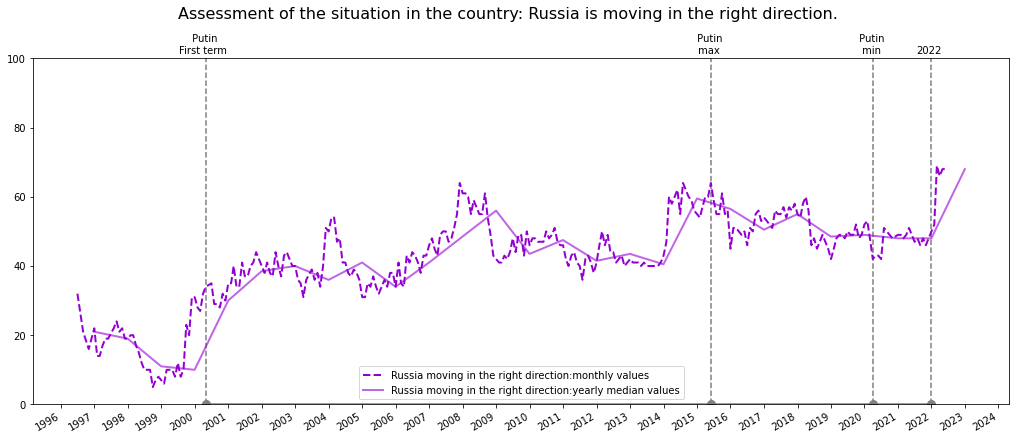

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True, sharey=True, sharex=True)

levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]

plt.ylim(0,100, 20)

ax.vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
    
line_up, = ax.plot(moving.date,moving['In the right direction'], linewidth=2,label='Russia moving in the right direction:monthly values', linestyle='dashed', color='darkviolet' )
line_down, = ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,label='Russia moving in the right direction:yearly median values',alpha=0.6, color='darkviolet' )


ax.legend(handles=[line_up, line_down],loc='lower center')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

fig.suptitle('Assessment of the situation in the country: Russia is moving in the right direction.', fontsize=16)


plt.savefig(str(new_dir)+ '/russia_moving_right.jpg') #use this when running whole notebook


SSI METHODOLOGY:
All the questions used in calculating the SSI seek to bring out positive or negative perceptions (or a pattern of change in these perceptions) in order to sharpen the expressiveness of the indicator. The focus is on four elements:
respondents’ family current situation (sub index FI, 2 questions)
general economic and political situation in Russia (sub index RI, 3 questions)
Assessment of President and government (sub index PI, 2 questions)
Expectations for personal and country situation (sub index EI, 5 questions)
An individual index for each question is calculated as the difference between positive and negative answers, to which 100 is added to avoid negative values of the index. The aggregate SSI is calculated as the arithmetic mean of individual indices. Thus, the SSI varies in the range from 0 to 200, where values below 100 indicate the prevalence of negative appraisals among the public. (‘https://www.levada.ru/en/social-sentiment-index/)


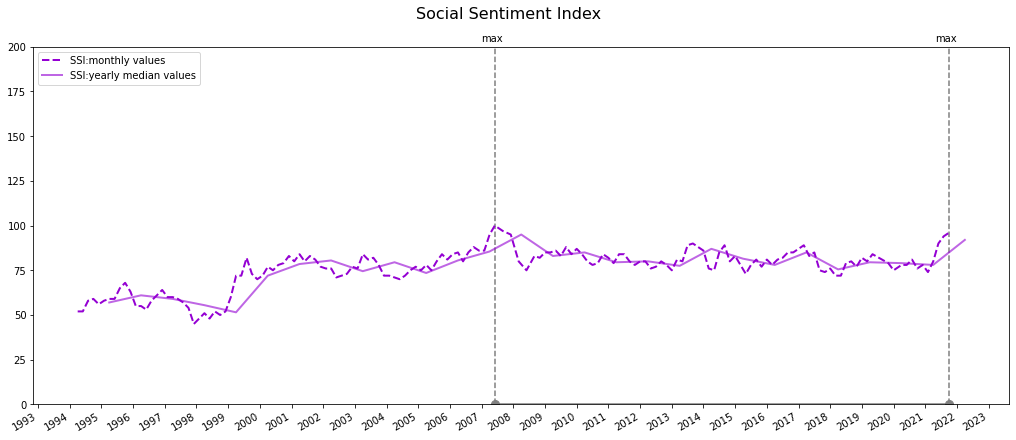

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True, sharey=True, sharex=True)

levels = np.tile([ 200, 200,], int(np.ceil(len(dates)/2)))[:len(dates)]

plt.ylim(0,200, 20)

texto = ['max', 'max']

ax.vlines(dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(dates, np.zeros_like(dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d,l, r in zip(dates,levels, texto):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
    
line_up, = ax.plot(ssi.date,ssi['Social Sentiment Index'], linewidth=2,label='SSI:monthly values', linestyle='dashed', color='darkviolet' )
line_down, = ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,label='SSI:yearly median values',alpha=0.6, color='darkviolet' )

ax.legend(handles=[line_up, line_down],loc='upper left')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

fig.suptitle('Social Sentiment Index', fontsize=16)

plt.savefig(str(new_dir)+ '/social_sentiment.jpg')


In [ ]:
wb_data_norm = pd.read_csv('.../World_Bank/2022-08-09/w_b_normalized.csv') 

In [ ]:
wb_data_norm['Year'] = pd.to_datetime(wb_data_norm['Year'].astype(str).str.strip(), format='%Y')

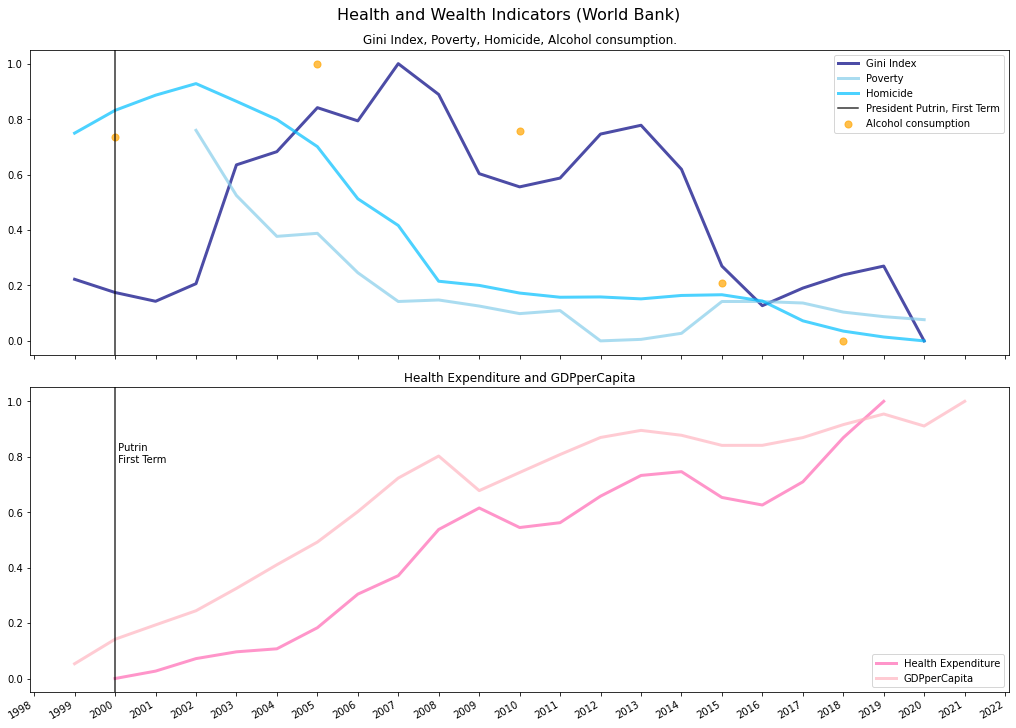

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(ncols=1, nrows =2, figsize=(14, 10), constrained_layout=True, sharey=True, sharex=True)

ax[0].scatter(wb_data_norm['Year'], wb_data_norm['alcohol consumption'],s=50,c='orange', alpha=0.7)

ax[0].plot(wb_data_norm['Year'], wb_data_norm['Gini Index'], linewidth=3, color='navy',alpha=0.7)
ax[0].plot(wb_data_norm['Year'], wb_data_norm['Poverty'],linewidth=3, color='skyblue',alpha=0.7 )
ax[0].plot(wb_data_norm['Year'], wb_data_norm['Homicide'],linewidth=3, color='deepskyblue',alpha=0.7)


ax[1].plot(wb_data_norm['Year'], wb_data_norm['Health Expenditure'],linewidth=3, color='hotpink',alpha=0.7)
ax[1].plot(wb_data_norm['Year'], wb_data_norm['GDPperCapita'],linewidth=3, color='lightpink',alpha=0.7)


ax[0].axvline(pd.Timestamp('2000'),color='black',linestyle='solid', alpha=0.8)
ax[1].axvline(pd.Timestamp('2000'),color='black',linestyle='solid', alpha=0.8)
ax[1].text(x=pd.Timestamp('2000'), y=.78, s=' Putrin\n First Term', color='black')

plt.setp(ax[0].get_xticklabels(), rotation=30, ha="right")
plt.setp(ax[1].get_xticklabels(), rotation=30, ha="right")

ax[0].legend(['Gini Index','Poverty', 'Homicide', 'President Putrin, First Term', 'Alcohol consumption' ])
ax[1].legend(['Health Expenditure', 'GDPperCapita',])

ax[0].title.set_text('Gini Index, Poverty, Homicide, Alcohol consumption.',)
ax[1].title.set_text('Health Expenditure and GDPperCapita')

ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax[0].get_xticklabels(), rotation=30, ha="right")


fig.suptitle('Health and Wealth Indicators (World Bank)', fontsize=16)

plt.savefig(str(new_dir)+ '/economic_social_indicators_world_data.jpg')

VC.IHR.PSRC.P5 :Intentional homicides (per 100,000 people)

In [ ]:
wb_data = pd.read_csv('.../World_Bank/2022-08-09/w_bank_data.csv')


In [ ]:
hom = wb_data[['index', 'VC.IHR.PSRC.P5']]
hom.columns = ['year', 'Intentional homicides (per 100,000 people)' ]

In [ ]:
wiki_journalists = pd.read_csv('...2022-08-09/journalists_death.csv')


In [ ]:
wiki_journalists['scaled'] = wiki_journalists['event_occurances']/wiki_journalists['event_occurances'].max()

In [ ]:
combo = pd.merge(hom, wiki_journalists, on='year', how='outer')

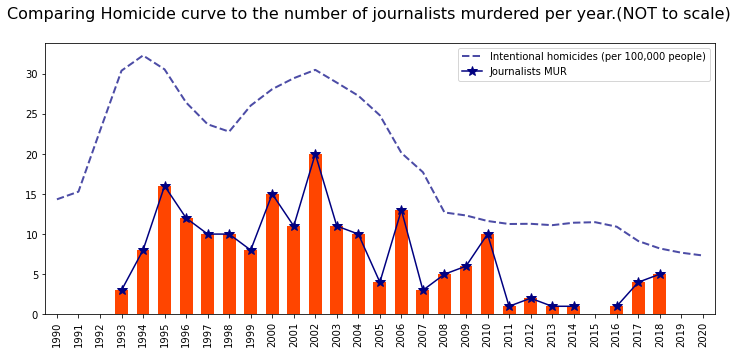

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,5))  
combo['Intentional homicides (per 100,000 people)'].plot(linestyle='dashed', linewidth=2, color='navy',alpha=0.7)
combo['event_occurances'].plot.bar( width=.6,color=('orangered'), ax=ax)
combo['event_occurances'].plot(kind='line', marker='*', color='navy', ms=10)
ax.legend(['Intentional homicides (per 100,000 people)', 'Journalists MUR'])

ax.set_xticklabels(combo.year,  rotation=90)
fig.suptitle ( 'Comparing Homicide curve to the number of journalists murdered per year.(NOT to scale)', fontsize=16)

plt.savefig(str(new_dir)+ '/journalist_MUR.jpg')

In [ ]:
terror = pd.read_csv('../2022-08-09/terror_incidents.csv')
terror['datetime'] = pd.to_datetime(terror['datetime'].str.strip(), format='%Y-%m')

In [ ]:
conflict = pd.read_csv('.../2022-08-09/conflicts_russian_federation.csv')
conflict['datetime'] = pd.to_datetime(conflict['datetime'].str.strip(), format='%Y-%m')

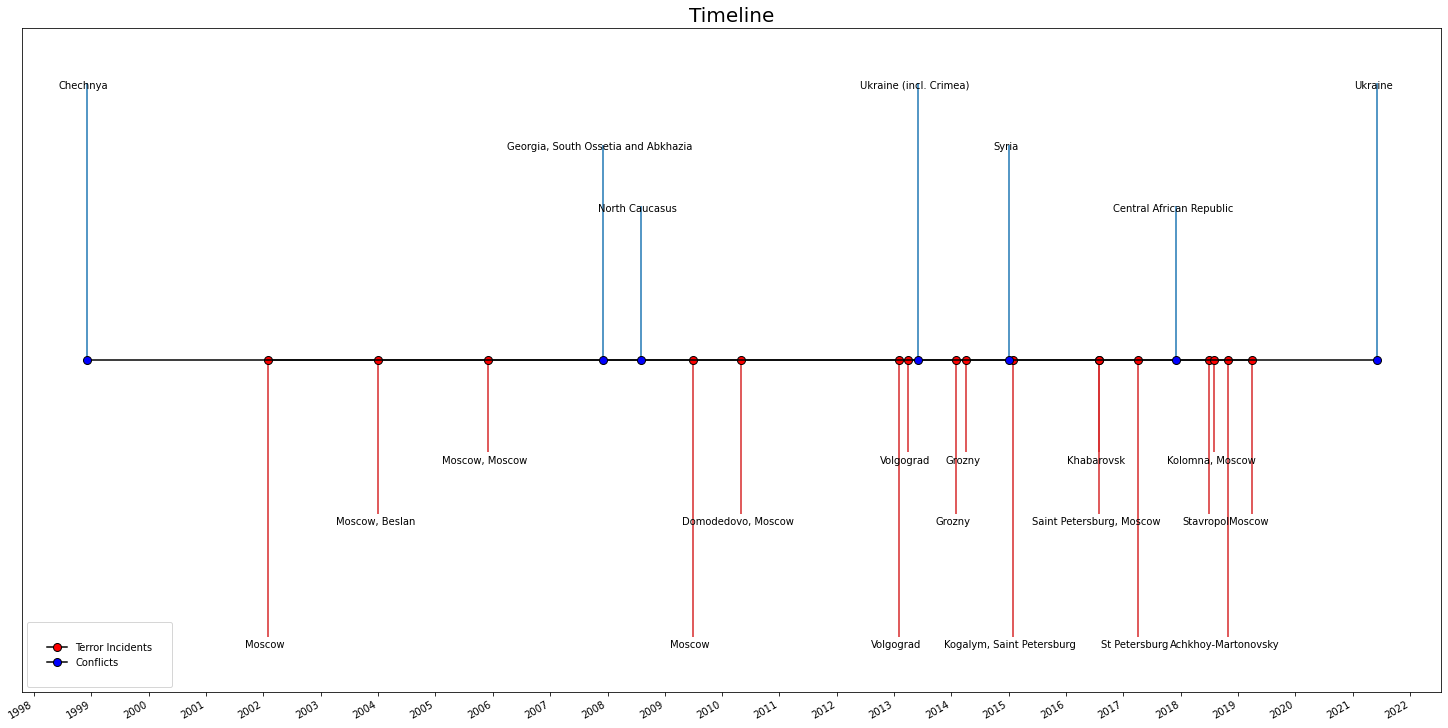

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

names = terror['city_name_mapped'].to_list()
conflicts = conflict['Location'].to_list()
#conf_date = conf_short['Start_Date']
conf_date = [datetime.strptime(d, "%Y-%m-%d") for d in conflict['datetime'].astype(str)]
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in terror['datetime'].astype(str)]
# Choose levels
levels = np.tile([ 9 , 7 , 5],
                 int(np.ceil(len(dates)/3)))[:len(conf_date )]
levels_neg = np.tile([ -9 , -5 , -3],
                 int(np.ceil(len(dates)/3)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True, sharey=True,)

plt.title('Timeline', fontsize=20)

ax.vlines(dates, 0, levels_neg, color="tab:red", )  # The vertical stems.
ax.vlines(conf_date, 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="red", markersize=8)  # Baseline and markers on it.
ax.plot(conf_date, np.zeros_like(conf_date), "-o",
        color="k", markerfacecolor="blue", markersize=8)

# annotate lines
for d, l, r in zip(dates, levels_neg, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top", wrap=True)
for dc, l, c in zip(conf_date, levels, conflicts):
    ax.annotate(c, xy=(dc, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="top", wrap=True)

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.margins(y=0.1)
ax.legend(['Terror Incidents', 'Conflicts'],borderpad=2, loc =3)
plt.savefig(str(new_dir)+ '/time_line.jpg')


In [ ]:
terror_grouped = (terror.groupby(pd.Grouper(key='datetime', axis=0, freq='Y')).sum()).reset_index()
terror_grouped['arb_val_terror' ] = terror_grouped['arb_val_terror' ] /80
terror_grouped= terror_grouped[['datetime','arb_val_terror' ]]

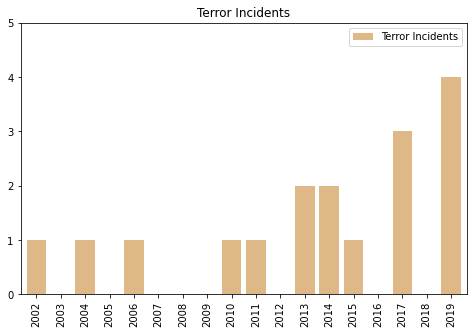

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates

terror_grouped['year'] = (terror_grouped.datetime.astype(str).str[:4]).astype(int)

fig, ax = plt.subplots(figsize=(8,5))  

plt.ylim(0,5, 1)

terror_grouped['arb_val_terror' ].plot.bar( width=.8,color=('burlywood'), ax=ax)

ax.legend(['Terror Incidents'])

ax.set_xticklabels(terror_grouped.year, rotation=90)
plt.title('Terror Incidents')
plt.savefig(str(new_dir)+ '/terror_Incidents.jpg')

In [ ]:
# measures taken to manage the flow/access of information

cens =  pd.read_csv('.../2022-08-09/censorship_plus.csv')
cens['datetime'] = pd.to_datetime(cens['datetime'].str.strip(), format='%Y-%m')


In [ ]:
cens_grouped = (cens.groupby(pd.Grouper(key='datetime', axis=0, freq='Y')).sum()).reset_index()

In [ ]:
cens_grouped['year'] = (cens_grouped['datetime'].astype(str).str[:4]).astype(int)

In [ ]:
interval_min = 1
interval_max = 95
cens_grouped['censor_score_scaled'] = (cens_grouped['censor_score'] - cens_grouped['censor_score'].min()) / (cens_grouped['censor_score'].max() - cens_grouped['censor_score'].min() ) * (interval_max - interval_min) + interval_min

In [ ]:
cens_grouped['cum_sum'] = cens_grouped['censor_score'].cumsum()

In [ ]:
cens_grouped['arb_score_cumsum_scaled'] = (cens_grouped['cum_sum'] - cens_grouped['cum_sum'].min()) / (cens_grouped['cum_sum'].max() - cens_grouped['cum_sum'].min() ) * (interval_max - interval_min) + interval_min

In [ ]:
#scaling columns for graphing:

a = cens_grouped['event_occurances'].min()
b = cens_grouped['event_occurances'].max()
cens_grouped['cum_sum_scale'] = (cens_grouped['cum_sum'] - cens_grouped['cum_sum'].min()) / (cens_grouped['cum_sum'].max() - cens_grouped['cum_sum'].min() ) * (b - a) + a


In [ ]:
select_cens_grouped = cens_grouped[['datetime','event_occurances','arbitrary_score', 'censor_score']]
year = select_cens_grouped['datetime']
select_cens_grouped.drop(columns=['datetime'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
select_cens_grouped = (select_cens_grouped -select_cens_grouped .min())/(select_cens_grouped.max()-select_cens_grouped .min())

In [ ]:
select_cens_grouped['cumsum'] = select_cens_grouped['censor_score'].cumsum()

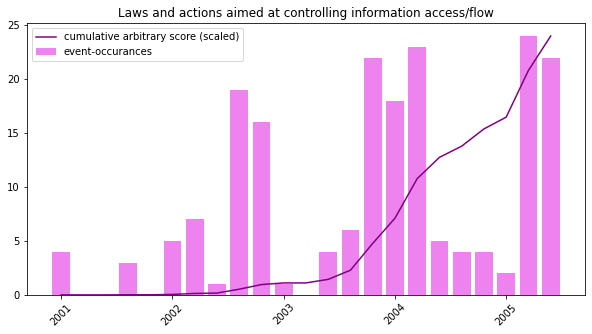

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(10, 5), sharex=True)

ax.plot(cens_grouped['year'], cens_grouped['cum_sum_scale'], color='purple') 
ax.bar(cens_grouped['year'], cens_grouped['event_occurances' ],width=.8,color=('violet'))

ax.set_xticklabels(cens_grouped.year, rotation=45)

plt.legend(['cumulative arbitrary score (scaled)','event-occurances',  ])
plt.title('Laws and actions aimed at controlling information access/flow')
plt.savefig(str(new_dir)+ '/censorship_events.jpg')

In [ ]:
fred_info=['...Fred_data/2022-08-09/CCUSMA02RUM618N.csv',
'...Fred_data/2022-08-09/DCOILBRENTEU.csv',
'.../Fred_data/2022-08-09/PNGASEUUSDM.csv',
'.../Fred_data/2022-08-09/PWHEAMTUSDM.csv']


In [ ]:
df_list=[]
for item in fred_info:
  df = pd.read_csv(item)
  df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y-%m')
  df_grouped = (df.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()
  df_list.append(df_grouped )


In [ ]:
fred_all = [df.set_index(['date']) for df in df_list]
fred_results = pd.concat(fred_all, axis=1).reset_index()

In [ ]:
fred_1999 = fred_results[fred_results['date']>'1999']


In [ ]:
d_names = {'CCUSMA02RUM618N': 'ruble',
 'DCOILBRENTEU': 'oil_eu',
 'PNGASEUUSDM': 'natural_gas_eu',
 'PWHEAMTUSDM': 'wheat',}

In [ ]:
fred_1999 = fred_1999.rename(columns=d_names)

In [ ]:
# LOG for graph
fred_1999_time =fred_1999['date'].to_list()
fred_1999_data= fred_1999.iloc[:, 1:]
fred_1999_data  =np.log(fred_1999_data )
fred_1999_data['date']= fred_1999_time

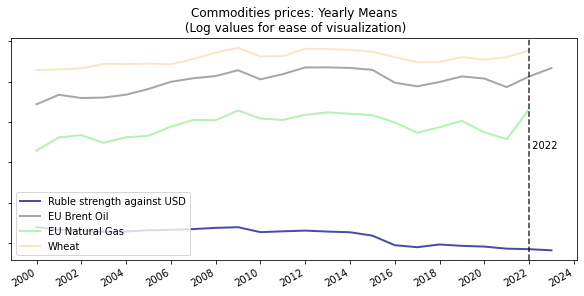

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(8, 4), constrained_layout=True, sharey=True,)

ax.set_yticklabels([])

ax.plot(fred_1999_data.date, fred_1999_data['ruble'], linewidth=2,alpha=0.7, color='navy')
ax.plot(fred_1999_data.date, fred_1999_data['oil_eu'], linewidth=2,alpha=0.7, color='gray')
ax.plot(fred_1999_data.date, fred_1999_data['natural_gas_eu'],  linewidth=2,alpha=0.7, color='lightgreen')
ax.plot(fred_1999_data.date, fred_1999_data['wheat'], linewidth=2,alpha=0.7, color='wheat')

ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022'), y=0.70, s=' 2022', color='black')

ax.xaxis.set_major_locator(mdates.YearLocator(2, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['Ruble strength against USD','EU Brent Oil', 'EU Natural Gas','Wheat' ],loc=3)
plt.title('Commodities prices: Yearly Means\n (Log values for ease of visualization)')
plt.savefig(str(new_dir)+ '/commodities_yearly_means.jpg')

In [ ]:
#GDP growth (annual %)

wb_data_gdp_growth = pd.read_csv('...World_Bank/2022-08-12/w_bank_data_GDP_growth.csv') 
wb_data_gdp_growth['Year'] = pd.to_datetime(wb_data_gdp_growth['Year'].astype(str).str.strip(), format='%Y')
wb_data_gdp_growth_us_rus = wb_data_gdp_growth[['Year','RUS GDP growth (annual %) ','US GDP growth (annual %)' ]] 

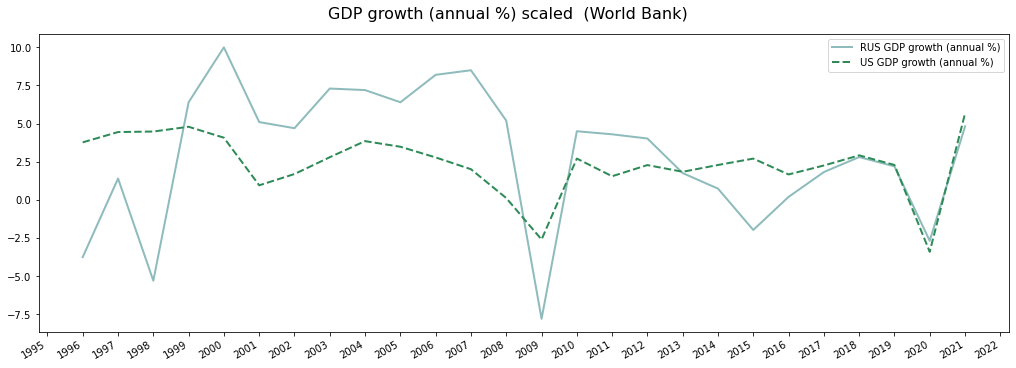

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates


fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)


ax.plot(wb_data_gdp_growth.Year, wb_data_gdp_growth['RUS GDP growth (annual %) '],linewidth=2, color='cadetblue',alpha=0.7)
ax.plot(wb_data_gdp_growth.Year, wb_data_gdp_growth['US GDP growth (annual %)'],linewidth=2,linestyle= 'dashed', color='seagreen')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDP growth (annual %)', 'US GDP growth (annual %)' ])

fig.suptitle('GDP growth (annual %) scaled  (World Bank)', fontsize=16)

plt.savefig(str(new_dir)+ '/gdp_growth_rate_world_data.jpg')

In [ ]:
gdp_pp = pd.read_csv('.../World_Bank/2022-08-12/w_bank_data.csv')
gdp_pp['index'] = pd.to_datetime(gdp_pp['index'].astype(str).str.strip(), format='%Y')
gdp_pp_russ = gdp_pp[['index', 'SH.XPD.GHED.PP.CD' ]]
gdp_pp_russ.columns = ['Year', 'GDPperCapita RUSSIA']	


In [ ]:
growth_gdp_ppp = pd.merge(gdp_pp_russ, wb_data_gdp_growth_us_rus, on='Year', how='outer')


In [ ]:
use_cols = growth_gdp_ppp.columns[1:].to_list()

In [ ]:
growth_gdp_ppp.columns[1:]

Index(['GDPperCapita RUSSIA', 'RUS GDP growth (annual %) ',
       'US GDP growth (annual %)'],
      dtype='object')

In [ ]:
# normalizing growth and gdpp
growth_gdp_ppp_norm = (growth_gdp_ppp[use_cols]-growth_gdp_ppp[use_cols].min())/ (growth_gdp_ppp[use_cols].max() - growth_gdp_ppp[use_cols].min())


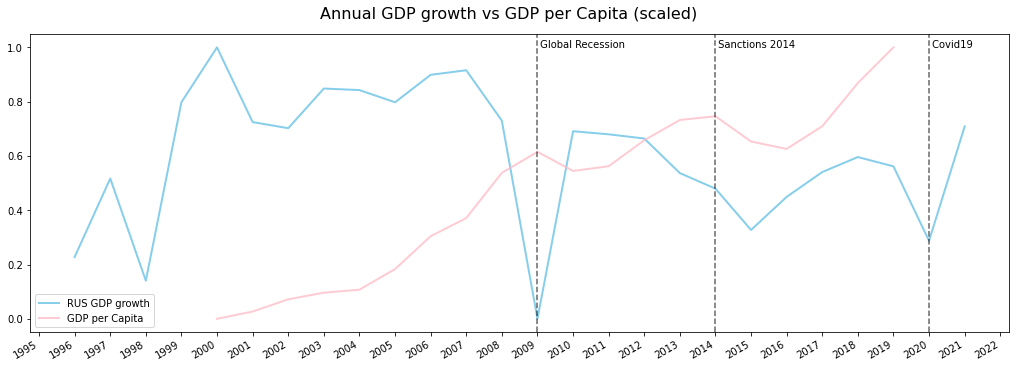

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates


fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)


ax.plot(growth_gdp_ppp.Year, growth_gdp_ppp_norm['RUS GDP growth (annual %) '],linewidth=2, color='skyblue')
ax.plot(growth_gdp_ppp.Year, growth_gdp_ppp_norm['GDPperCapita RUSSIA'],linewidth=2, color='lightpink',alpha=0.7)

ax.axvline(pd.Timestamp('2009'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2009'), y=1, s=' Global Recession', color='black', horizontalalignment="left")

ax.axvline(pd.Timestamp('2014'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2014'), y=1, s=' Sanctions 2014',color='black', horizontalalignment="left")

ax.axvline(pd.Timestamp('2020'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2020'), y=1, s=' Covid19',color='black', horizontalalignment="left")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDP growth', 'GDP per Capita' ], loc='lower left')

fig.suptitle('Annual GDP growth vs GDP per Capita (scaled)', fontsize=16)

plt.savefig(str(new_dir)+ '/economic_GDPgrowth_GDPP_indicators_world_data.jpg')

In [ ]:
# EU US 
import pandas as pd

In [ ]:
eu_att = pd.read_csv('...Levada/2022-08-09/Levada_Attitude to the EU.csv')
eu_att['date'] = pd.to_datetime(eu_att['date'].str.strip(), format='%Y-%m')

In [ ]:
us_att = pd.read_csv('.../Levada/2022-08-09/Levada_Attitude to the US.csv')
us_att['date'] = pd.to_datetime(us_att['date'].str.strip(), format='%Y-%m')

In [ ]:
eu_att_gr =(eu_att.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()
us_att_gr =(us_att.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()

In [ ]:
us_att_gr  = us_att_gr [us_att_gr ['date']>'1999']

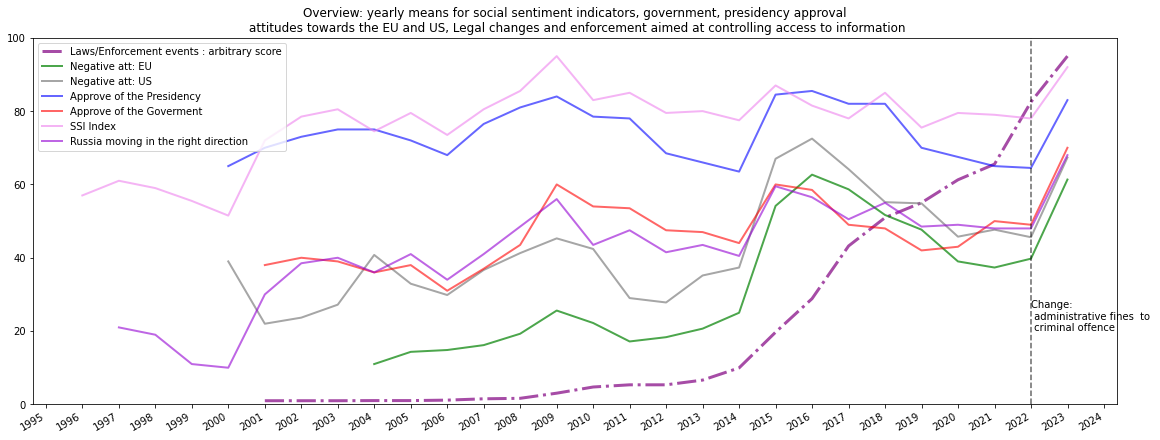

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax  = plt.subplots(figsize=(16, 6), constrained_layout=True)

plt.ylim(0,100, 20)

ax.plot(cens_grouped.datetime, cens_grouped['arb_score_cumsum_scaled'],linewidth=3, linestyle= "dashdot", alpha=0.7, color='purple')
ax.plot(eu_att_gr.date, eu_att_gr['Negative'], linewidth=2,alpha=0.7, color='green')
ax.plot(us_att_gr.date, us_att_gr['Negative'], linewidth=2,alpha=0.7, color='gray')
ax.plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.6, color='blue')
ax.plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.6, color='red')
ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,alpha=0.6, color='violet' )
ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,alpha=0.6, color='darkviolet' )


ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2022'), y=20, s='Change: \n administrative fines  to \n criminal offence', color='black', horizontalalignment="left")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


plt.legend(['Laws/Enforcement events : arbitrary score','Negative att: EU', 'Negative att: US', 'Approve of the Presidency', 'Approve of the Goverment', 'SSI Index', 'Russia moving in the right direction' ], loc='upper left')
plt.title('Overview: yearly means for social sentiment indicators, government, presidency approval\n attitudes towards the EU and US, Legal changes and enforcement aimed at controlling access to information')

plt.savefig(str(new_dir)+ '/overall_all_indicators_with_censorship.jpg')

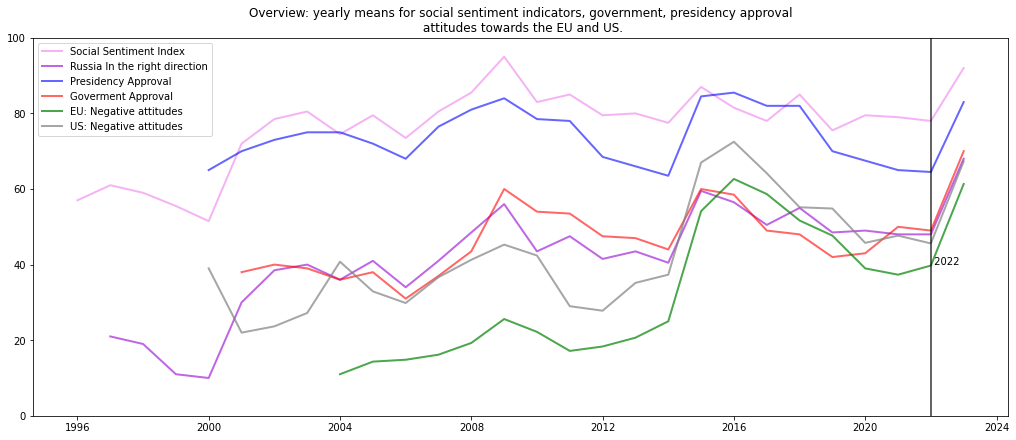

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(14, 6), constrained_layout=True, sharey=True,)

plt.ylim(0,100, 20)

ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,alpha=0.6, color='violet' )
ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,alpha=0.6, color='darkviolet' )

ax.plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.6, color='blue')
ax.plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.6, color='red')

ax.plot(eu_att_gr.date, eu_att_gr['Negative'], linewidth=2,alpha=0.7, color='green')
ax.plot(us_att_gr.date, us_att_gr['Negative'], linewidth=2,alpha=0.7, color='gray')

ax.axvline(pd.Timestamp('2022'),color='black',linestyle='solid', alpha=0.8)
ax.text(x=pd.Timestamp('2022'), y=40, s=' 2022', color='black')

plt.legend(['Social Sentiment Index', 'Russia In the right direction','Presidency Approval', 'Goverment Approval', 'EU: Negative attitudes', 'US: Negative attitudes'  ]) #,loc=1, bbox_to_anchor=(0.9,3))
plt.title('Overview: yearly means for social sentiment indicators, government, presidency approval\n attitudes towards the EU and US.')

plt.savefig(str(new_dir)+ '/overall_all_indicators.jpg')

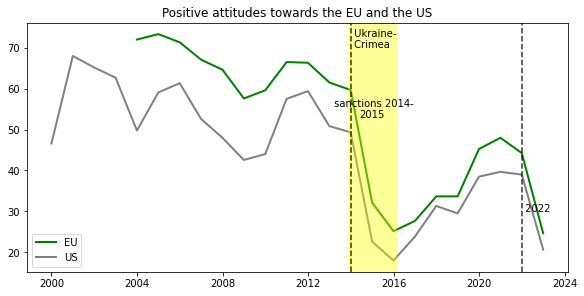

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(8, 4), constrained_layout=True, sharey=True,)

ax.plot(eu_att_gr.date, eu_att_gr['Positive'], linewidth=2, color='green')
ax.plot(us_att_gr.date, us_att_gr['Positive'], linewidth=2, color='gray')

ax.axvline(pd.Timestamp('2014'),color='yellow',linewidth=1, alpha=0.4)
ax.axvline(pd.Timestamp('2015'),color='yellow',linewidth=49, alpha=0.4)
ax.text(x=pd.Timestamp('2015'), y=50, s=' sanctions 2014-\n2015\n', horizontalalignment="center", color='black')


ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022'), y=30, s=' 2022', color='black')

ax.axvline(pd.Timestamp('2014'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2014'), y=70, s=' Ukraine-\n Crimea', color='black')



plt.legend(['EU', 'US' ])
plt.title('Positive attitudes towards the EU and the US')
plt.savefig(str(new_dir)+ '/sanctions_2014_15.jpg')